# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [48]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [49]:
bank_data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [50]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [51]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [52]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [53]:
def show_missing_data(df):
  na_counts = df.isna().sum()
  na_percent = df.isna().mean() * 100

  na_summary = pd.concat([na_counts, na_percent], axis=1)
  na_summary.columns = ['NA Count', 'NA Percentage']
  na_summary.sort_values(by='NA Percentage', ascending=False, inplace=True)

  na_summary = na_summary[
      (na_summary['NA Count'] > 0) &
      (na_summary['NA Percentage'] > 0)
  ]
  print(na_summary)

show_missing_data(bank_data)

Empty DataFrame
Columns: [NA Count, NA Percentage]
Index: []


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [54]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']

numeric_cols = ['age', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx',
                'cons.conf.idx', 'euribor3m', 'nr.employed']

In [55]:
# Define features and target
categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                    'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_cols = ['age', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                'euribor3m', 'nr.employed']

# Drop 'duration' to avoid data leakage
bank_data = bank_data.drop(columns=['duration'])

In [56]:
# Encode target
bank_data['y'] = bank_data['y'].map({'yes': 1, 'no': 0})

X = bank_data.drop(columns='y')
y = bank_data['y']

In [57]:
# Preprocessing pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [58]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [59]:
dummy = DummyClassifier(strategy='most_frequent')  # majority class
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

print("Baseline performance:")
print(classification_report(y_test, y_dummy_pred, digits=3, zero_division=0))

Baseline performance:
              precision    recall  f1-score   support

           0      0.887     1.000     0.940      9137
           1      0.000     0.000     0.000      1160

    accuracy                          0.887     10297
   macro avg      0.444     0.500     0.470     10297
weighted avg      0.787     0.887     0.834     10297



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [60]:
# Reuse preprocessing pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [61]:
# Predict
y_pred_logreg = logreg_pipeline.predict(X_test)

# Evaluate
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg, digits=3))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0      0.909     0.988     0.947      9137
           1      0.701     0.218     0.333      1160

    accuracy                          0.901     10297
   macro avg      0.805     0.603     0.640     10297
weighted avg      0.885     0.901     0.878     10297



### Problem 9: Score the Model

What is the accuracy of your model?

In [62]:
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy:.3f}")

Logistic Regression Accuracy: 0.901


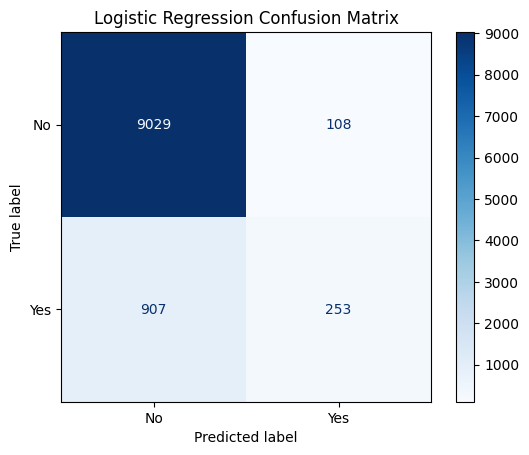

In [63]:
ConfusionMatrixDisplay.from_estimator(logreg_pipeline, X_test, y_test, display_labels=['No', 'Yes'], cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [64]:
# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC()
}

In [65]:
results = []

for name, model in models.items():
    # Create pipeline
    clf = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', model)
    ])

    # Time training
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()

    # Evaluate
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    results.append({
        'Model': name,
        'Train Time (s)': round(end - start, 3),
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3)
    })

# Present results in DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,1.409,0.900,0.901
1,KNN,0.194,0.912,0.898
2,Decision Tree,0.458,0.996,0.839
3,SVM,152.871,0.905,0.903


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [66]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [67]:
# Lets do some feature engineering and convert categorical to numeric. Drop columns that are not required.

In [68]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [69]:
data = X.copy()

# Encode target if present
# if 'y' in data.columns:
#    data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Add engineered features
data['was_previously_contacted'] = (data['pdays'] != 999).astype(int)
data['prev_success'] = ((data['poutcome'] == 'success') & (data['previous'] > 0)).astype(int)

# Cyclical encoding
month_map = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
             'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
data['month_num'] = data['month'].map(month_map)
data['month_sin'] = np.sin(2 * np.pi * data['month_num'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month_num'] / 12)

day_map = {'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4}
data['day_num'] = data['day_of_week'].map(day_map)
data['day_sin'] = np.sin(2 * np.pi * data['day_num'] / 7)
data['day_cos'] = np.cos(2 * np.pi * data['day_num'] / 7)

# Drop raw features that are now redundant
data.drop(columns=['month', 'day_of_week', 'pdays', 'previous', 'month_num', 'day_num'], inplace=True)


In [70]:
data['age_group'] = pd.cut(data['age'],
                            bins=[0, 30, 50, 100],
                            labels=['young', 'middle-aged', 'senior'])


In [71]:
print(data['default'].value_counts(normalize=True))

default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64


In [72]:
data.drop(columns='default', inplace=True)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       41188 non-null  int64   
 1   job                       41188 non-null  object  
 2   marital                   41188 non-null  object  
 3   education                 41188 non-null  object  
 4   housing                   41188 non-null  object  
 5   loan                      41188 non-null  object  
 6   contact                   41188 non-null  object  
 7   campaign                  41188 non-null  int64   
 8   poutcome                  41188 non-null  object  
 9   emp.var.rate              41188 non-null  float64 
 10  cons.price.idx            41188 non-null  float64 
 11  cons.conf.idx             41188 non-null  float64 
 12  euribor3m                 41188 non-null  float64 
 13  nr.employed               41188 non-null  floa

In [74]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Updated categorical and numeric columns
categorical_cols_fe = ['job', 'marital', 'education', 'housing',
                       'loan', 'contact', 'poutcome', 'age_group']

numeric_cols_fe = ['age', 'campaign', 'emp.var.rate', 'cons.price.idx',
                   'cons.conf.idx', 'euribor3m', 'nr.employed',
                   'month_sin', 'month_cos', 'day_sin', 'day_cos',
                   'was_previously_contacted', 'prev_success']

# Transformers
numeric_transformer_fe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer_fe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# New Feature Engineering Preprocessor
feature_engineering_preprocessor = ColumnTransformer([
    ('num', numeric_transformer_fe, numeric_cols_fe),
    ('cat', categorical_transformer_fe, categorical_cols_fe)
])


In [75]:
param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10]
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 10, None],
        'classifier__min_samples_split': [2, 10, 20]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}


In [76]:
X_train, X_test, y_train, y_test = train_test_split(data, y, stratify=y, random_state=42)

In [77]:
# Create pipeline
logreg_pipe = Pipeline([
    ('preprocessing', feature_engineering_preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define param grid
logreg_params = {
    'classifier__C': [0.01, 0.1, 1, 10]
}

In [78]:
# Run Grid Search
logreg_grid = GridSearchCV(logreg_pipe, logreg_params, cv=3, scoring='accuracy', n_jobs=-1)

start = time.time()
logreg_grid.fit(X_train, y_train)
end = time.time()

# Predict
logreg_train_acc = accuracy_score(y_train, logreg_grid.predict(X_train))
logreg_test_acc = accuracy_score(y_test, logreg_grid.predict(X_test))

print("Logistic Regression Results")
print("Best Params:", logreg_grid.best_params_)
print("Train Accuracy:", round(logreg_train_acc, 3))
print("Test Accuracy:", round(logreg_test_acc, 3))
print("Train Time (s):", round(end - start, 2))

Logistic Regression Results
Best Params: {'classifier__C': 0.01}
Train Accuracy: 0.9
Test Accuracy: 0.9
Train Time (s): 3.6


In [92]:
results = []
results.append({
    'Model': 'Logistic Regression',
    'Best Params': logreg_grid.best_params_,
    'Train Accuracy': round(logreg_train_acc, 3),
    'Test Accuracy': round(logreg_test_acc, 3),
    'Train Time (s)': round(end - start, 2)
})

In [80]:
"""
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}
"""

"\nmodels = {\n    'Logistic Regression': LogisticRegression(max_iter=1000),\n    'KNN': KNeighborsClassifier(),\n    'Decision Tree': DecisionTreeClassifier(),\n    'SVM': SVC()\n}\n"

In [81]:
"""
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessing', feature_engineering_preprocessor),
        ('classifier', model)
    ])

    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()

    best_model = grid.best_estimator_
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_model.predict(X_test))

    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'Train Accuracy': round(train_acc, 3),
        'Test Accuracy': round(test_acc, 3),
        'Train Time (s)': round(end - start, 2)
    })
"""

"\nresults = []\n\nfor name, model in models.items():\n    pipe = Pipeline([\n        ('preprocessing', feature_engineering_preprocessor),\n        ('classifier', model)\n    ])\n\n    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)\n\n    start = time.time()\n    grid.fit(X_train, y_train)\n    end = time.time()\n\n    best_model = grid.best_estimator_\n    train_acc = accuracy_score(y_train, best_model.predict(X_train))\n    test_acc = accuracy_score(y_test, best_model.predict(X_test))\n\n    results.append({\n        'Model': name,\n        'Best Params': grid.best_params_,\n        'Train Accuracy': round(train_acc, 3),\n        'Test Accuracy': round(test_acc, 3),\n        'Train Time (s)': round(end - start, 2)\n    })\n"

In [94]:
knn_pipe = Pipeline([
    ('preprocessing', feature_engineering_preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn_params = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=3, scoring='accuracy', n_jobs=-1)

start = time.time()
knn_grid.fit(X_train, y_train)
end = time.time()

knn_train_acc = accuracy_score(y_train, knn_grid.predict(X_train))
knn_test_acc = accuracy_score(y_test, knn_grid.predict(X_test))

In [95]:
print("KNN Results")
print("Best Params:", knn_grid.best_params_)
print("Train Accuracy:", round(knn_train_acc, 3))
print("Test Accuracy:", round(knn_test_acc, 3))
print("Train Time (s):", round(end - start, 2))

KNN Results
Best Params: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}
Train Accuracy: 0.909
Test Accuracy: 0.898
Train Time (s): 35.24


In [96]:
results.append({
    'Model': 'KNN',
    'Best Params': knn_grid.best_params_,
    'Train Accuracy': round(knn_train_acc, 3),
    'Test Accuracy': round(knn_test_acc, 3),
    'Train Time (s)': round(end - start, 2)
})

In [98]:
dt_pipe = Pipeline([
    ('preprocessing', feature_engineering_preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt_params = {
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 10, 20]
}

dt_grid = GridSearchCV(dt_pipe, dt_params, cv=3, scoring='accuracy', n_jobs=-1)

start = time.time()
dt_grid.fit(X_train, y_train)
end = time.time()

dt_train_acc = accuracy_score(y_train, dt_grid.predict(X_train))
dt_test_acc = accuracy_score(y_test, dt_grid.predict(X_test))

In [99]:
print("Decision Tree Results")
print("Best Params:", dt_grid.best_params_)
print("Train Accuracy:", round(dt_train_acc, 3))
print("Test Accuracy:", round(dt_test_acc, 3))
print("Train Time (s):", round(end - start, 2))

Decision Tree Results
Best Params: {'classifier__max_depth': 5, 'classifier__min_samples_split': 20}
Train Accuracy: 0.902
Test Accuracy: 0.901
Train Time (s): 8.59


In [100]:
results.append({
    'Model': 'Decision Trees',
    'Best Params': dt_grid.best_params_,
    'Train Accuracy': round(dt_train_acc, 3),
    'Test Accuracy': round(dt_test_acc, 3),
    'Train Time (s)': round(end - start, 2)
})

In [102]:
# SVM with whole data is taking lot of time. Lets do with limited data
# Subsample to 5000 rows for faster SVM training
X_train_svm = X_train.sample(n=5000, random_state=42)
y_train_svm = y_train.loc[X_train_svm.index]

svm_pipe = Pipeline([
    ('preprocessing', feature_engineering_preprocessor),
    ('classifier', SVC())
])

svm_params = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(svm_pipe, svm_params, cv=3, scoring='accuracy', n_jobs=-1)


start = time.time()
# svm_grid.fit(X_train, y_train)
svm_grid.fit(X_train_svm, y_train_svm)
end = time.time()

svm_train_acc = accuracy_score(y_train_svm, svm_grid.predict(X_train_svm))
svm_test_acc = accuracy_score(y_test, svm_grid.predict(X_test))

In [103]:
print("SVM Results")
print("Best Params:", svm_grid.best_params_)
print("Train Accuracy:", round(svm_train_acc, 3))
print("Test Accuracy:", round(svm_test_acc, 3))
print("Train Time (s):", round(end - start, 2))

SVM Results
Best Params: {'classifier__C': 1, 'classifier__kernel': 'rbf'}
Train Accuracy: 0.913
Test Accuracy: 0.899
Train Time (s): 9.34


In [104]:
results.append({
    'Model': 'SVM',
    'Best Params': svm_grid.best_params_,
    'Train Accuracy': round(svm_train_acc, 3),
    'Test Accuracy': round(svm_test_acc, 3),
    'Train Time (s)': round(end - start, 2)
})

In [105]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df[['Model', 'Best Params', 'Train Accuracy', 'Test Accuracy', 'Train Time (s)']]
results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

results_df

,Model,Best Params,Train Accuracy,Test Accuracy,Train Time (s)
0,Decision Trees,"{'classifier__max_depth': 5, 'classifier__min_...",0.902,0.901,8.59
1,Logistic Regression,{'classifier__C': 0.01},0.900,0.900,9.82
2,SVM,"{'classifier__C': 1, 'classifier__kernel': 'rbf'}",0.913,0.899,9.34
3,KNN,"{'classifier__n_neighbors': 7, 'classifier__we...",0.909,0.898,35.24


##### Questions

Summary:

1. Feature Engineering & Exploration:
We removed the default column due to extreme imbalance and missing values.
We engineered features like was_previously_contacted, prev_success, and cyclical encodings for month and day_of_week.
The dataset has no gender feature, but if it were present, we would likely exclude it due to fairness, ethical concerns, and low predictive value in financial outreach.

2. Hyperparameter Tuning:
We used GridSearchCV to tune key hyperparameters for each model:
Logistic Regression: C
KNN: n_neighbors, weights
Decision Tree: max_depth, min_samples_split
SVM: C, kernel — trained on a subsample for performance reasons
This improved performance over default settings.

3. Adjusting Performance Metric:
While we used accuracy for initial comparison, this may not reflect real-world effectiveness.
We plan to evaluate models using F1-score, precision, or ROC-AUC next, especially since class imbalance (target yes ≈ 11%) is present.

In [106]:
# F1 score and recall
from sklearn.metrics import f1_score, recall_score

# Predict on test set
y_pred_dt = dt_grid.best_estimator_.predict(X_test)
y_pred_lr = logreg_grid.best_estimator_.predict(X_test)

# Decision Tree
print("Decision Tree:")
print("F1-score:", round(f1_score(y_test, y_pred_dt), 3))
print("Recall:", round(recall_score(y_test, y_pred_dt), 3))

# Logistic Regression
print("\nLogistic Regression:")
print("F1-score:", round(f1_score(y_test, y_pred_lr), 3))
print("Recall:", round(recall_score(y_test, y_pred_lr), 3))


Decision Tree:
F1-score: 0.368
Recall: 0.256

Logistic Regression:
F1-score: 0.3
Recall: 0.19


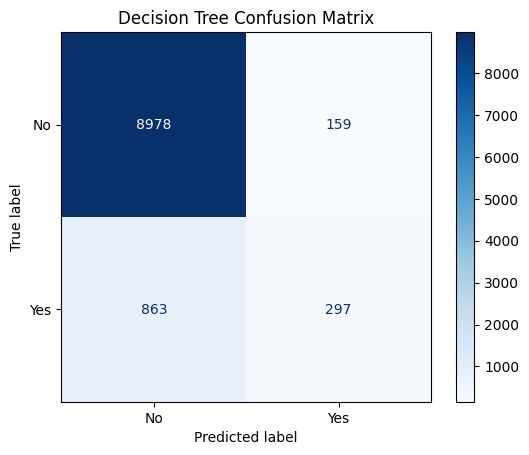

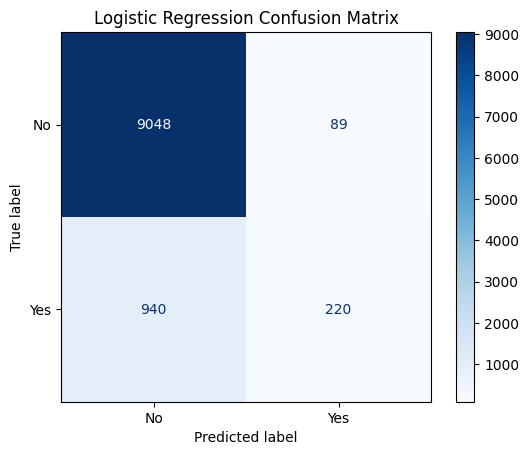

In [107]:
# Confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_grid.best_estimator_, X_test, y_test, display_labels=['No', 'Yes'], cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(logreg_grid.best_estimator_, X_test, y_test, display_labels=['No', 'Yes'], cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


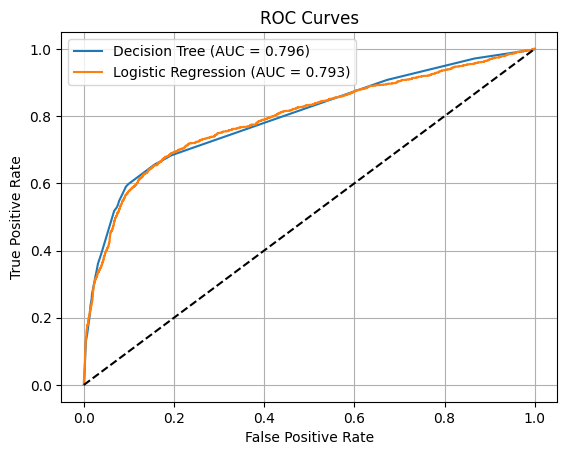

In [108]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_proba_dt = dt_grid.best_estimator_.predict_proba(X_test)[:, 1]
y_proba_lr = logreg_grid.best_estimator_.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.3f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid()
plt.show()


✅ ROC Curve Summary
*  Both Decision Tree and Logistic Regression perform similarly in terms of AUC (Area Under Curve):
  *  Decision Tree AUC: 0.796
  *  Logistic Regression AUC: 0.793

*  This indicates both models are similarly effective at distinguishing between the positive (yes) and negative (no) classes.
The curves rise well above the diagonal line, which means both models perform significantly better than random guessing.

*  The Decision Tree has a slightly higher AUC, suggesting it may capture some nonlinear patterns better than Logistic Regression.

*  Choosing between them may come down to:
  *  Interpretability → Logistic Regression is more transparent.
  *  Performance → Decision Tree offers a slight edge in this dataset.
  *  Runtime → Decision Tree is also very fast to train and predict.

✅ Next Steps
*   Evaluate precision, recall, and F1-score to better handle class imbalance.
*   Try threshold tuning to optimize recall for positive class (e.g., predicting yes).
*   Consider ensemble methods like Random Forest or Gradient Boosting for further accuracy gains.
*   Explore cost-sensitive learning if false negatives are more costly.
*   Package and export the best model (e.g., Decision Tree) for deployment or testing on unseen data.